# TITANIC DATASET PROJECT

### Project Overview:
#### What will we be doing in this project:
#### 1. Load the dataset:
##### Load the dataset into a pandas data frame and display the first 10 rows of the data frame to gain familiarity with the data structure.
#### 2. Data Cleaning:
##### - Identify and handle missing values appropriately.
##### - Remove any duplicated records.
##### - Convert all date-related columns into a standard format (if applicable).
##### - Create a new column for the passenger's age group ("Child," "Adult," "Senior") based on the 'Age' column.
#### 3. Data Exploratory Data Analysis:
##### - Provide a summary of the dataset using descriptive statistics.
##### - Visualize the distribution of passengers by gender using a bar plot.
##### - Create a histogram for the age distribution.
##### - Visualize the survival rate by gender and class.
##### - You can add any interesting visualizations
#### 4. Basic Statistical Analysis:
##### - Calculate the mean, median, and mode for the 'Fare' and 'Age' columns.
##### - Perform a t-test to determine if there's a significant difference in survival rate based on gender.
##### - You can add any interesting statistical analysis,
#### 5. Documentation:
##### - Explain the rationale for each data cleaning step.
##### - Interpret and explain the visualizations and statistical findings.

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get Familiar with the Dataset
#### Task 1: Load the dataset into a pandas data frame and display the first 10 rows of the data frame to gain familiarity with the data structure.

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test=pd.read_csv("test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
test.shape

(418, 11)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Cleaning:
#### 1. Handling Missing Values

In [11]:
#copying the full dataset so that I can handle missing values in the copied dataset and compare the analysis with the original dataset
train_copy = train.copy()

In [12]:
# Checking for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#checking missing values from the test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# For 'Age', I am replacing missing values with the median, as it is a continuous numerical variable
# and we can avoid outliers by taking the median rather than the mean.
train_copy['Age'].fillna(train_copy['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
train_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Almost two-thirds of the column 'Cabin' values are missing. I am dropping this column as I feel too many values are missing to make any statistical analysis
train_copy.drop(columns=['Cabin'], inplace=True)

In [20]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [68]:
# In 'Embarked' column there are only 2 missing values and therefore, we'll fill missing values with the most common port.
train_copy['Embarked'].fillna(train_copy['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [69]:
#checking if there are any other missing values or not
train_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

#### 2. Remove any duplicated records

In [31]:
# Checking for duplicated records and removing them
print("Number of duplicated records:", train_copy.duplicated().sum())
train_copy.drop_duplicates(inplace=True)

Number of duplicated records: 0


#### 3. Convert all date-related columns into a standard format (if applicable).
##### There are no date-related columns in this dataset and therefore it is not applicable.

#### 4. Create a new column for the passenger's age group ("Child," "Adult," "Senior") based on the 'Age' column.

In [32]:
#creating a new column named "AgeGroup" based on the passenger's age
train_copy['AgeGroup'] = np.where(train_copy['Age'] < 18, 'Child',
                         np.where(train_copy['Age'] < 60, 'Adult', 'Senior'))

In [33]:
#checking whether the new column has been created or not
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis (EDA):

#### 1. Provide a summary of the dataset using descriptive statistics.

In [50]:
#Summary of the Dataset
train_copy.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. Visualize the distribution of passengers by gender using a bar plot.

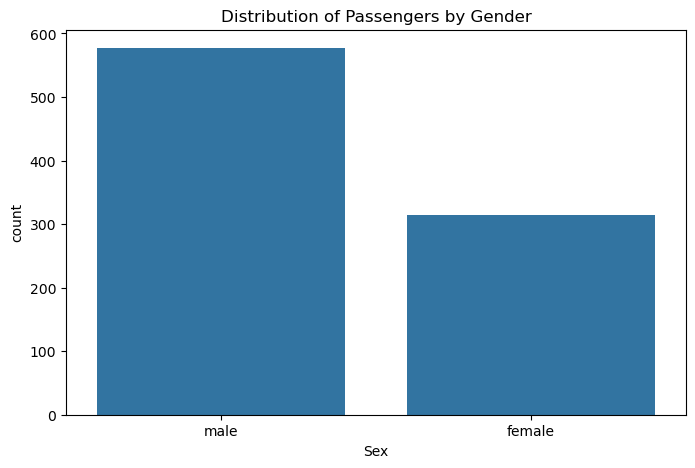

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=train_copy)
plt.title('Distribution of Passengers by Gender')
plt.show()

#### 3. Create a histogram for the age distribution

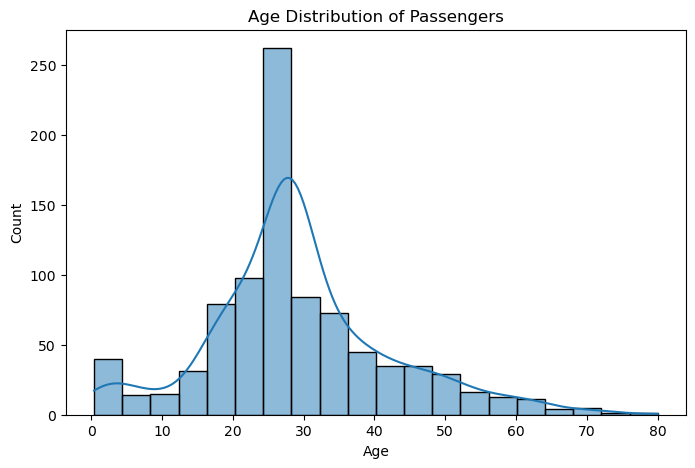

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(train_copy['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

#### 4. Visualize the survival rate by gender and class

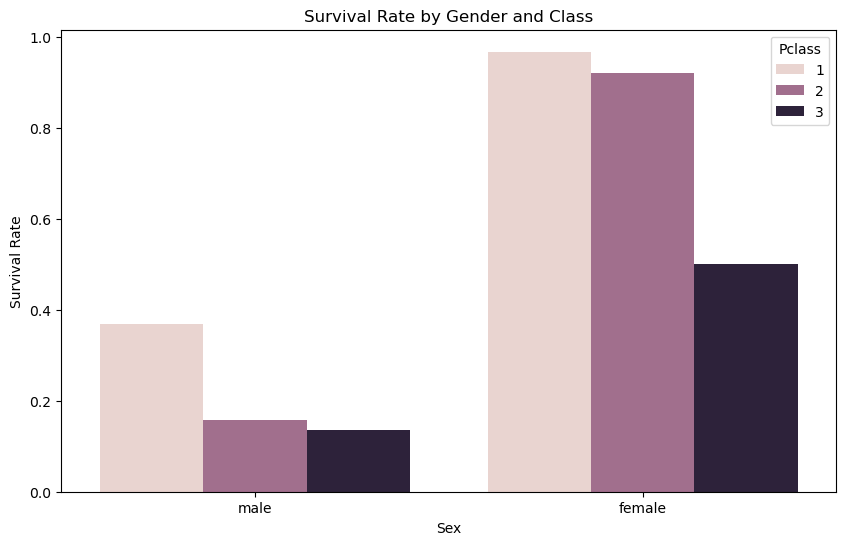

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_copy, errorbar=None)
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.show()

#### 5. Other Interesting Visualizations

In [57]:
#checking ratio of male and female survivor
train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [35]:
print("After Handling Missing Values:")
train_copy[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

After Handling Missing Values:


,Sex,Survived
0,female,0.742038
1,male,0.188908


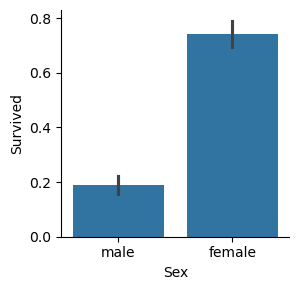

In [36]:
#representing this ration in a graph
sns.catplot(x="Sex", y ="Survived", data=train, kind="bar", height=3)
plt.show()

##### Here we can see, only 19% of the male survived whereas 74% female survived the incident

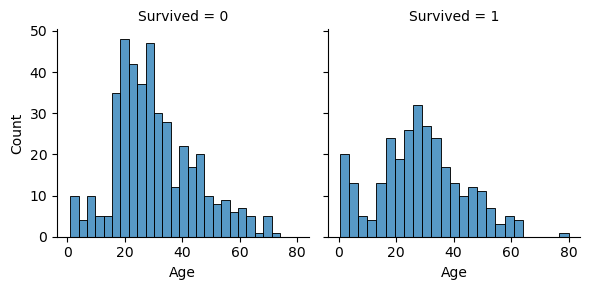

In [37]:
#mapping the age group of survived (survived=1) and non-survived (survived=1) people by creating histogram
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

##### From these graph, we can see that the person who aged between 18-30 died more and people around 28-35 survived more

After Handling Missing Values:


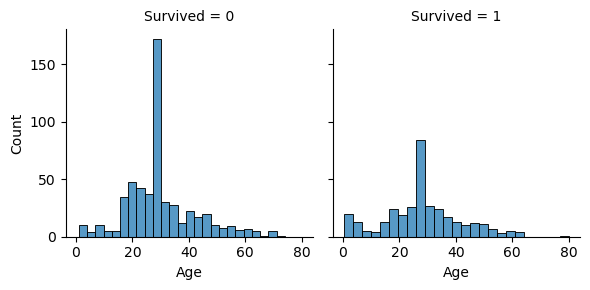

In [38]:
print("After Handling Missing Values:")
sns.FacetGrid(train_copy, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

In [28]:
train['Age'].mean()

29.69911764705882

##### Here as the median of the original dataset was 28, we can see there is a domination of age=28 in both survived and non-survived graphs

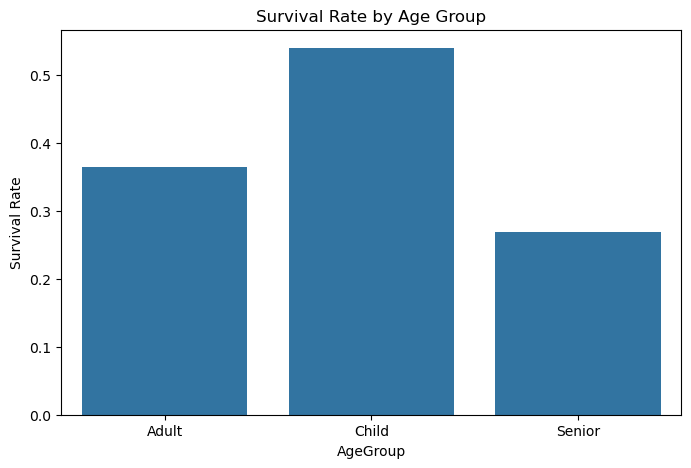

In [60]:
##Survival Rate by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=train_copy, errorbar=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

Before Handling the missing values:


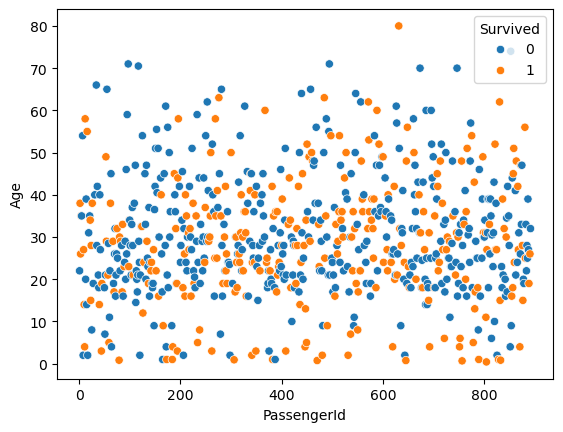

In [41]:
#representing the survived and non-survived people based on age in a scatter graph to look for any pattern
print("Before Handling the missing values:")
sns.scatterplot(x = train.PassengerId, y = train['Age'], hue = train['Survived'])
plt.show()

##### We can see that people who were below 10 years old survived more
##### From all the above graphs, we can make an assumption that may be female and children were being prioritized to rescue as they survived more

After Handling Missing Values:


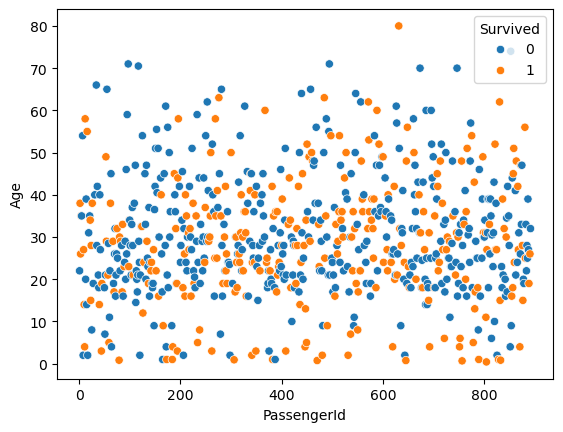

In [39]:
print("After Handling Missing Values:")
sns.scatterplot(x = train_copy.PassengerId, y = train['Age'], hue = train['Survived'])
plt.show()

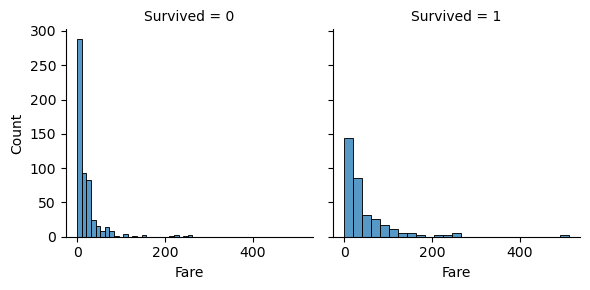

In [30]:
#mapping the survived and non-survived people based on fare to find out trends 
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Fare", bins=25)
plt.show()

Before Handling Missing Values:


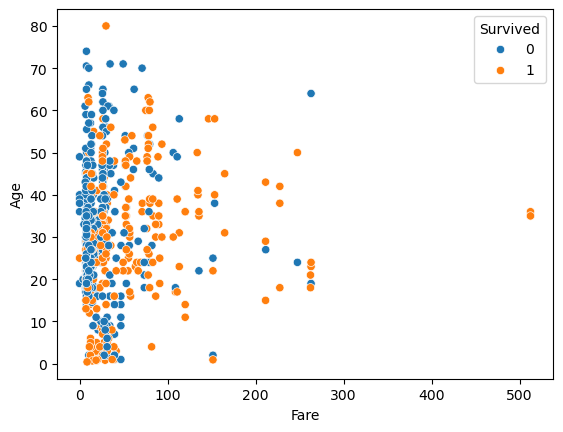

In [42]:
#plotting age and fare together to find pattern
print("Before Handling Missing Values:")
sns.scatterplot(x = train.Fare, y = train['Age'], hue = train['Survived'])
plt.show()

##### Here we can see, as the fair is increasing we can see blue dots are decreasing and there are a lot of blue dots where fare is in between 0-50
##### So, people with high fare rates have a higher probability of surviving than those with lower fare rates.

After Handling Missing Values:


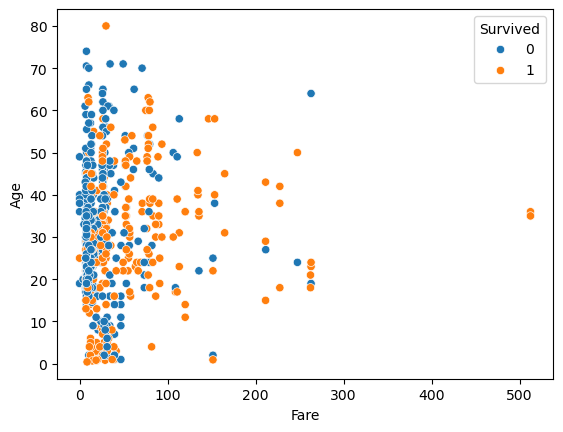

In [43]:
print("After Handling Missing Values:")
sns.scatterplot(x = train_copy.Fare, y = train['Age'], hue = train['Survived'])
plt.show()

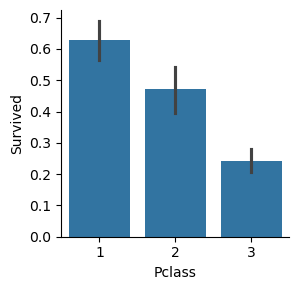

In [32]:
#probability of surviving based on passenger class
sns.catplot(x="Pclass", y ="Survived", data=train, kind="bar", height=3)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

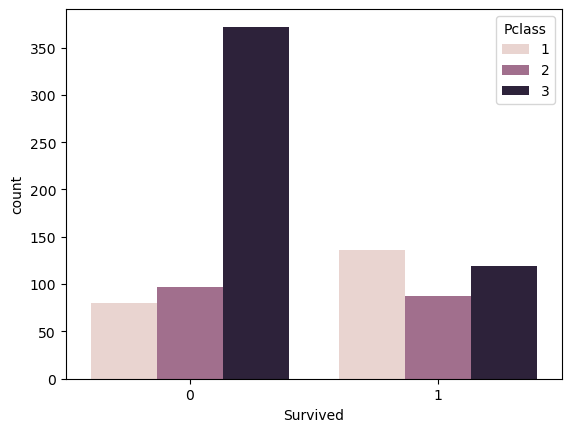

In [33]:
#mapping the survived and non-survived people based on Pclass to find out which category of passengers survived more 
sns.countplot(x='Survived',hue='Pclass',data=train)

##### Here, it is evident that the people who travelled in 3rd class died the most.

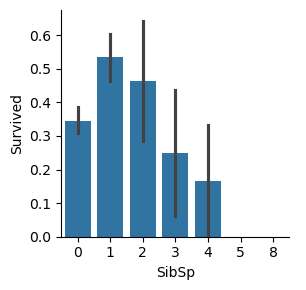

In [34]:
#plotting the survival rate of the people who travelled alone, with 1 more people, with 2 more people and so on.
# SibSp means number of siblings / spouses aboard the titanic
sns.catplot(x="SibSp", y ="Survived", data=train, kind="bar", height=3)
plt.show()

##### People who had 1 or 2 more people with him/her had a higher possibility of surviving.
##### Surprisingly, people who were alone or had more than 2 people together survived less.

In [35]:
#plotting the survival rate of the people who didn't have or had parents or children with them
#Parch means the number of parents/children aboard the Titanic
train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(['count','mean'])

Parch Survived          
           count      mean
0     0      678  0.343658
1     1      118  0.550847
2     2       80  0.500000
3     3        5  0.600000
4     4        4  0.000000
5     5        5  0.200000
6     6        1  0.000000

##### Surprisingly, the person who had total 3 person(children or parents) with them survived 60%
##### However, the person who had more than 3 people with them had almost no probability of surviving.

In [44]:
#identifying whether there is any relation of survival with the port of embarkation
# C = Cherbourg, Q = Queenstown, S = Southampton
print("Before Handling Missing Values:")
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

Before Handling Missing Values:


Embarked Survived          
              count      mean
0        C      168  0.553571
1        Q       77  0.389610
2        S      644  0.336957

In [45]:
print("After Handling Missing Values:")
train_copy[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

After Handling Missing Values:


Embarked Survived          
              count      mean
0        C      168  0.553571
1        Q       77  0.389610
2        S      646  0.339009

Before Handling Missing Values:


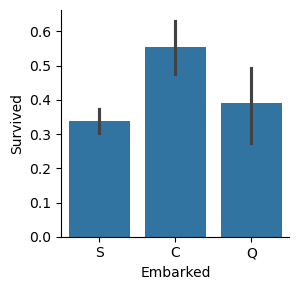

In [46]:
print("Before Handling Missing Values:")
sns.catplot(x="Embarked", y ="Survived", data=train, kind="bar", height=3)
plt.show()

##### Interestingly, the person who embarked from Cherbourg had 55% of survival rate compared to Queenstown (39%) and Southampton (33%)

After Handling Missing Values:


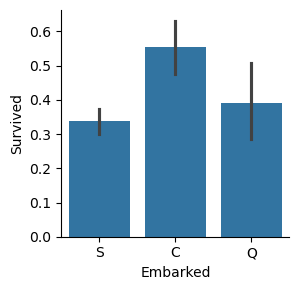

In [47]:
print("After Handling Missing Values:")
sns.catplot(x="Embarked", y ="Survived", data=train, kind="bar", height=3)
plt.show()

## Basic Statistical Analysis:

#### 1. Calculate the mean, median, and mode for the 'Fare' and 'Age' columns,

In [67]:
fare_mean, fare_median, fare_mode = train_copy['Fare'].mean(), train_copy['Fare'].median(), train_copy['Fare'].mode()[0]
age_mean, age_median, age_mode = train_copy['Age'].mean(), train_copy['Age'].median(), train_copy['Age'].mode()[0]

print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Mode: {fare_mode}")
print(f"Age - Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}")

Fare - Mean: 32.204207968574636, Median: 14.4542, Mode: 8.05
Age - Mean: 29.36158249158249, Median: 28.0, Mode: 28.0


#### 2. Perform a t-test to determine if there's a significant difference in survival rate based on gender.

In [73]:
from scipy import stats

In [74]:
# Group data by gender and survival
male_survived = train_copy[train_copy['Sex'] == 'male']['Survived']
female_survived = train_copy[train_copy['Sex'] == 'female']['Survived']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_survived, female_survived)
print(f"T-Test for Survival Rate Difference by Gender: t-statistic = {t_stat}, p-value = {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("The difference in survival rate between males and females is statistically significant.")
else:
    print("The difference in survival rate between males and females is not statistically significant.")

T-Test for Survival Rate Difference by Gender: t-statistic = -19.297816550123354, p-value = 1.4060661308802594e-69
The difference in survival rate between males and females is statistically significant.


#### 3. Other interesting statistical analysis
##### I wanted to implement Chi-Square Test (with gender and survival rate) and ANOVA Test (to see any variance) here. I know the concept theoretically but could not implement it practically here.
##### However, In the future I am planning to perform these test and update this file.